# CNN MODEL

In [ ]:
import numpy as np
from tensorflow.keras import layers,regularizers,models
import matplotlib.pyplot as plt
import os

In [35]:
def build_fc_model(input_shape=(181,1), num_class=8):
    
    
    model = models.Sequential([
                                    layers.BatchNormalization(input_shape=input_shape),
                                    layers.Conv1D(32,3,activation='relu',padding='same'),
                                    # layers.MaxPool1D(2,strides=1),
                                    layers.Dropout(0.2),
                                    
                                    layers.Conv1D(32,3,activation='relu',padding='same'),
                                    # layers.MaxPool1D(2,strides=1),
                                    layers.Dropout(0.2),
                                    # layers.BatchNormalization(),
                                    
                                    # layers.Conv1D(32,3,activation='relu'),
                                    # layers.MaxPool1D(2),
                                    # layers.Dropout(0.2),
                                    
                                    layers.BatchNormalization(),
                                    layers.Flatten(),
                                    layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(2e-4)),
                                    layers.Dropout(0.2),

                                    layers.Dense(512,activation='relu',kernel_regularizer=regularizers.l2(3e-4)),
                                    layers.Dropout(0.2),
                                    layers.BatchNormalization(),

                                    layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
                                    layers.Dropout(0.1),

                                    # layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)),
                                    # layers.Dropout(0.1),
                                    # layers.BatchNormalization(),


                                    layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [36]:
def load_features(feature_path):
    x = []
    y = []
    for feature in os.listdir(feature_path):
        feat = np.loadtxt(feature_path+feature,delimiter=',')
        x.append(feat)
        label = feature[-7]
        y.append(int(label))
    x = np.array(x)
    y = np.array(y)
    h,w = x.shape
    x = x.reshape(h,w,1)
    h = y.shape[0]
    y = y.reshape(h,1)
    return (x,y)

# Loading features

In [37]:
x_train,y_train = load_features('features/train/')
x_test,y_test = load_features('features/test/')
print((x_train.shape,y_test.shape))

((1152, 30, 1), (288, 1))


# Training the model
The model classifies human voices in 8 different classes of emotions

**label**   **emotion**

0   =   neutral

1   =   calm

2   =   happy

3   =   sad

4   =   angry

5   =   fearful

6   =   disgust

7   =   surprised

In [53]:
model=build_fc_model(x_train[0].shape)
# model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# csv_logger = CSVLogger('model_history.log', separator=',', append=False)
history=model.fit(x_train,y_train,epochs=150,batch_size=256,validation_data=(x_test,y_test))

1.4547 - accuracy: 0.5833 - val_loss: 2.0862 - val_accuracy: 0.4583
Epoch 10/150
5/5 [==============================] - 0s 27ms/step - loss: 1.3839 - accuracy: 0.6120 - val_loss: 2.0640 - val_accuracy: 0.4722
Epoch 11/150
5/5 [==============================] - 0s 28ms/step - loss: 1.3239 - accuracy: 0.6259 - val_loss: 2.0468 - val_accuracy: 0.4826
Epoch 12/150
5/5 [==============================] - 0s 28ms/step - loss: 1.2745 - accuracy: 0.6502 - val_loss: 2.0422 - val_accuracy: 0.4618
Epoch 13/150
5/5 [==============================] - 0s 26ms/step - loss: 1.2358 - accuracy: 0.6727 - val_loss: 2.0334 - val_accuracy: 0.4410
Epoch 14/150
5/5 [==============================] - 0s 26ms/step - loss: 1.2002 - accuracy: 0.6762 - val_loss: 2.0131 - val_accuracy: 0.4340
Epoch 15/150
5/5 [==============================] - 0s 28ms/step - loss: 1.1555 - accuracy: 0.6944 - val_loss: 1.9744 - val_accuracy: 0.4688
Epoch 16/150
5/5 [==============================] - 0s 27ms/step - loss: 1.1118 - accu

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_24 (Batc (None, 30, 1)             4         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 30, 32)            128       
_________________________________________________________________
dropout_39 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 30, 32)            3104      
_________________________________________________________________
dropout_40 (Dropout)         (None, 30, 32)            0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 30, 32)            128       
_________________________________________________________________
flatten_7 (Flatten)          (None, 960)              

## Plots

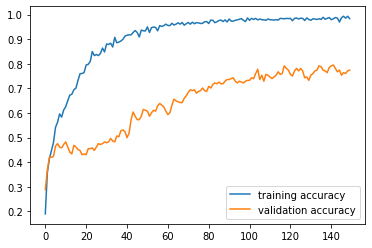

In [55]:
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'validation accuracy')
plt.legend()
plt.show()

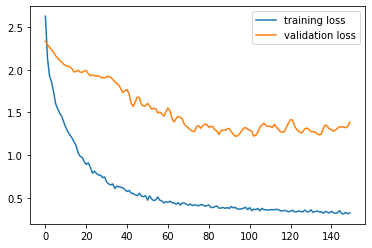

In [56]:
plt.plot(history.history['loss'],label = 'training loss')
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

In [58]:
model.save('cnn_model_team-4')

INFO:tensorflow:Assets written to: cnn_model_team-4/assets
